# Analysis of Car Price Detection
## Exploring Data or Data Collection

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
%matplotlib inline

In [302]:
df=pd.read_csv("car_price_prediction.csv")
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,04-May,Left wheel,Black,4


In [303]:
df.rename(columns={"Engine volume": "Engine_volume", "Prod. year": "Prod_year"}, inplace=True)
df

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine_volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,04-May,Left wheel,Black,4


### Find out the number of rows and columns
Print the number of rows in the dataset.

In [304]:
print(len(df))

19237


Print the number of columns in the dataset.

In [305]:
print(len(df.columns))

18


### Identify the data types of each column

In [306]:
df.dtypes

ID                   int64
Price                int64
Levy                object
Manufacturer        object
Model               object
Prod_year            int64
Category            object
Leather interior    object
Fuel type           object
Engine_volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object

Change the dtypes of Value object to Value int/float

In [307]:
df['Mileage']=df['Mileage'].str.replace("km"," ")
df['Engine_volume'] = df['Engine_volume'].str.replace("Turbo", " ")
df['Levy'] = df['Levy'].str.replace("-","0")

In [308]:
df['Mileage'] = df['Mileage'].astype(str).astype(float)
df['Engine_volume'] = df['Engine_volume'].astype(str).astype(float)
df['Levy'] = df['Levy'].astype(str).astype(int)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int32  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod_year         19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine_volume     19237 non-null  float64
 10  Mileage           19237 non-null  float64
 11  Cylinders         19237 non-null  int64  
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Print the no. of mean column cylinders of the car models.

In [196]:
df['Cylinders'].mean()

4.582991110880075

The dataset is the result of a many Manufacturer Brands. Print how many unique Brands are there in the Manufacturer column.

In [197]:
uniq = len(pd.unique(df['Manufacturer']))
print('Number of Unique Brands: ', uniq)

Number of Unique Brands:  65


## Data Wrangling

### Finding duplicates
Find how many duplicate rows exist in the dataframe.

In [310]:
df.duplicated().sum()

313

### Removing Duplicates
Remove the duplicate rows from the dataframe.

In [311]:
df.drop_duplicates(inplace = True)

Verify if duplicates were actually dropped.

In [312]:
df.duplicated().value_counts()

False    18924
dtype: int64

In [313]:
df.shape

(18924, 18)

In [314]:
## match previous no. of rows after drop duplicates 
19237 - 313

18924

### Finding Missing values
Find the missing values for all columns.

In [315]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather interior    0
Fuel type           0
Engine_volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Find out how many rows are missing in the column 'Category'

In [316]:
df['Category'].isnull().sum()

0

### Imputing missing values
Find the value counts for the column Category.

In [317]:
df['Category'].value_counts()

Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: Category, dtype: int64

Identify the value that is most frequent (majority) in the Category column.

In [318]:
df['Category'].value_counts().idxmax()

'Sedan'

Impute (replace) all the empty rows in the column Category with the value that you have identified as majority.

In [319]:
df['Category'].fillna(value = 'Sedan', inplace = True)

Verify if imputing was successful.
output is 0 because there is no empty rows but still I follows the process.

In [320]:
df['Category'].isnull().sum()

0

## Exploratory Data Analysis
### Distribution
#### Determine how the data is distributed
Plot the distribution curve for the column Engine volume.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


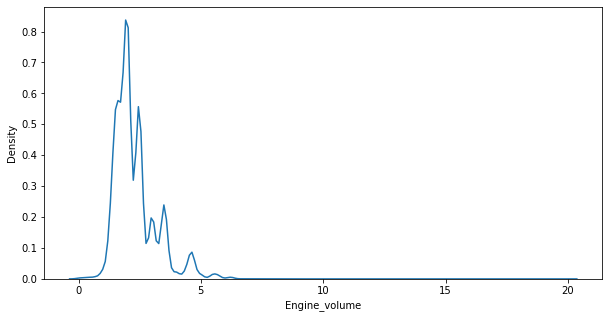

In [321]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["Engine_volume"],bins=20,hist=False)
plt.show()

Plot the histogram for the column Engine volume.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


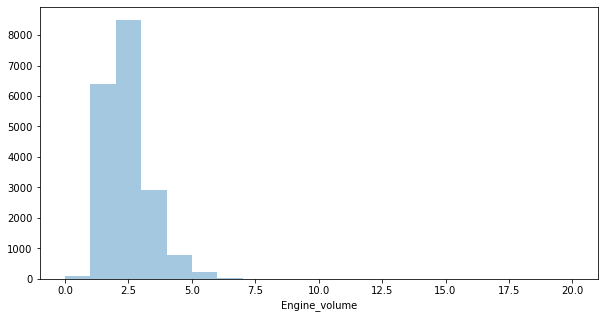

In [322]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["Engine_volume"],bins=20,kde=False)
plt.show()

What is the median of the column Engine volume?

In [323]:
df['Engine_volume'].median()

2.0

How many Cars identified themselves only as a type Diesel?

In [324]:
df['Fuel type'].value_counts()

Petrol            9944
Diesel            4001
Hybrid            3539
LPG                885
CNG                469
Plug-in Hybrid      85
Hydrogen             1
Name: Fuel type, dtype: int64

Find out the median Cylenders of Cars identified themselves only as a type CNG?

In [325]:
cng = df[df["Fuel type"] == "CNG"]
cng["Cylinders"].median()

4.0

All statistics calculations of all numeric columns or Six number summary of all columns 

In [326]:
df.describe()

,ID,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,632.886493,2010.914236,2.306251,1.555373e+06,4.580216,6.568379
std,9.375468e+05,1.921356e+05,568.273736,5.665749,0.877591,4.880221e+07,1.200223,4.322323
min,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,0.000000,2009.000000,1.800000,7.019575e+04,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,642.000000,2012.000000,2.000000,1.264000e+05,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,917.000000,2015.000000,2.500000,1.891198e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


Give the five number summary for the column Airbags?

In [327]:
df['Airbags'].describe()

count    18924.000000
mean         6.568379
std          4.322323
min          0.000000
25%          4.000000
50%          6.000000
75%         12.000000
max         16.000000
Name: Airbags, dtype: float64

Plot a histogram of the column Airbags.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


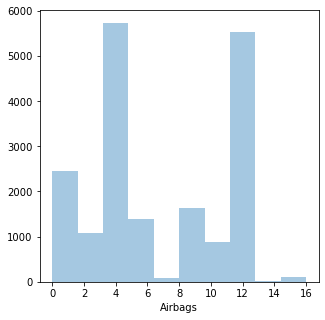

In [328]:
plt.figure(figsize=(5,5))
sns.distplot(a=df["Airbags"],bins=10,kde=False)
plt.show()

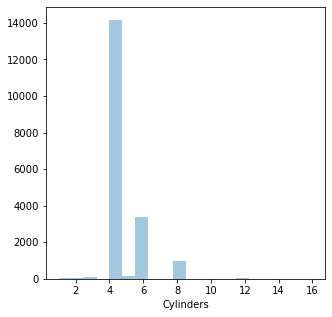

In [329]:
plt.figure(figsize=(5,5))
sns.distplot(a=df["Cylinders"],bins=20,kde=False)
plt.show()

### Outliers
#### Finding outliers and Removing Outliers
Find out if outliers exist in the column  using a box plot?

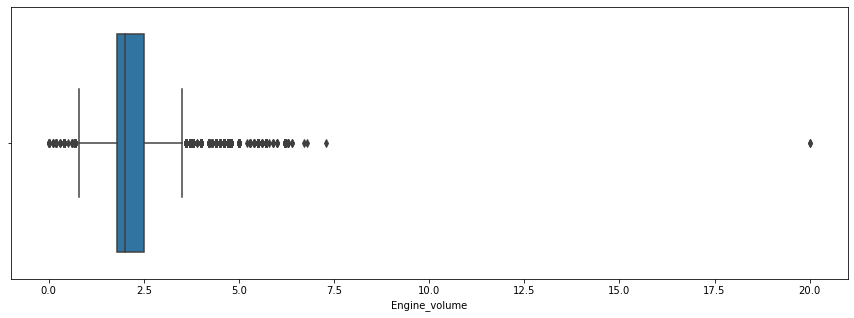

In [330]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.Engine_volume, data=df)
plt.show()

Find out the Inter Quartile Range for the column Engine volume

In [331]:
df['Engine_volume'].describe()

count    18924.000000
mean         2.306251
std          0.877591
min          0.000000
25%          1.800000
50%          2.000000
75%          2.500000
max         20.000000
Name: Engine_volume, dtype: float64

In [332]:
2.500000 - 1.800000

0.7

Find out the upper and lower bounds.

In [333]:
Q1 = df["Engine_volume"].quantile(0.25)
Q3 = df["Engine_volume"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.7


Identify how many outliers are there in the Engine volume column.

In [334]:
outliers = (df["Engine_volume"] < (Q1 - 1.5 * IQR)) | (df["Engine_volume"] > (Q3 + 1.5 * IQR))
outliers.value_counts()

False    17566
True      1358
Name: Engine_volume, dtype: int64

Create a new dataframe by removing the outliers from the Engine volume column.

In [335]:
less = (df["Engine_volume"] < (Q1 - 1.5 * IQR))
less.value_counts()

False    18841
True        83
Name: Engine_volume, dtype: int64

In [336]:
more = (df["Engine_volume"] > (Q3 + 1.5 * IQR))
more.value_counts()

False    17649
True      1275
Name: Engine_volume, dtype: int64

In [337]:
Enginevolume_out = df[~(df["Engine_volume"] > (Q3 + 1.5 * IQR))]
Enginevolume_out.head()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine_volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4,Automatic,Front,04-May,Left wheel,Silver,4


In [338]:
Enginevolume_out["Engine_volume"].median()

2.0

In [339]:
Enginevolume_out["Engine_volume"].mean()

2.142478327383981

### Correlation
#### Finding correlation
Find the correlation all numerical columns.

In [340]:
df.corr()

,ID,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
ID,1.000000,-0.000797,0.103477,0.072030,-0.013155,0.004225,-0.040617,-0.022070
Price,-0.000797,1.000000,-0.003558,0.012689,0.008888,-0.001763,0.007435,-0.012709
Levy,0.103477,-0.003558,1.000000,0.362827,0.378117,-0.021203,0.251632,0.125015
Prod_year,0.072030,0.012689,0.362827,1.000000,-0.032427,-0.064058,-0.099443,0.235160
Engine_volume,-0.013155,0.008888,0.378117,-0.032427,1.000000,-0.006292,0.777228,0.221991
Mileage,0.004225,-0.001763,-0.021203,-0.064058,-0.006292,1.000000,-0.001720,-0.009174
Cylinders,-0.040617,0.007435,0.251632,-0.099443,0.777228,-0.001720,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.125015,0.235160,0.221991,-0.009174,0.174112,1.000000


Find correlation through heat map

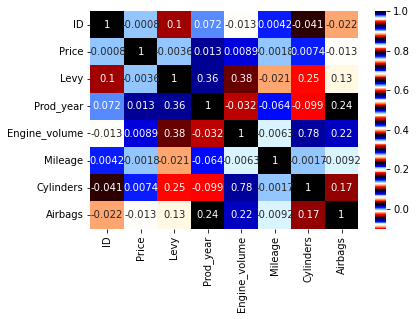

In [341]:
sns.heatmap(df.corr(), cmap = "flag",annot=True)
plt.show()

In [392]:
df

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine_volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4,Automatic,Front,04-May,Left wheel,Black,4


## Data Visualization
Display the relation between Airbags and Cylinders

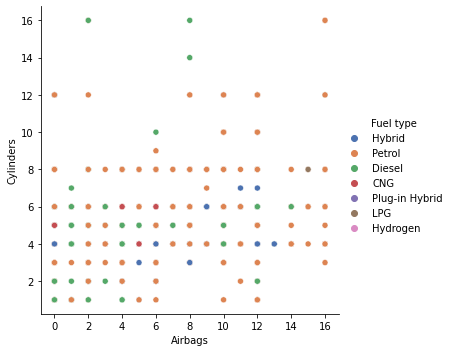

In [343]:
sns.relplot(data=df, x='Airbags', y='Cylinders', hue='Fuel type', palette='deep')

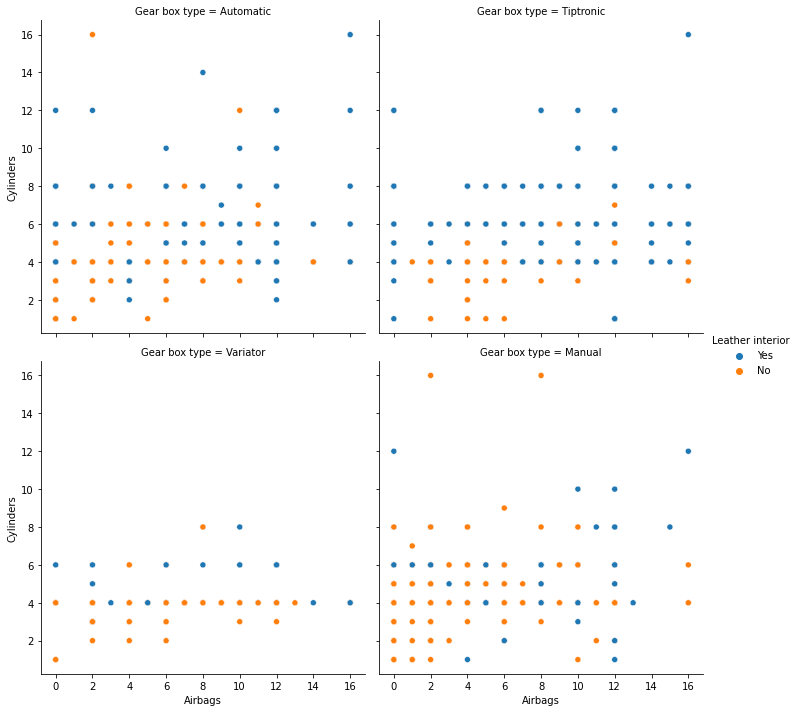

In [344]:
sns.relplot(data=df, x='Airbags', y='Cylinders', hue='Leather interior',col='Gear box type',col_wrap=2)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


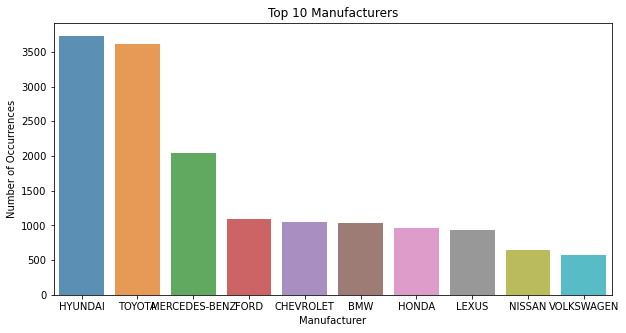

In [345]:
manu_count  = df['Manufacturer'].value_counts()
manu_count = manu_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(manu_count.index, manu_count.values, alpha=0.8)
plt.title('Top 10 Manufacturers')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Manufacturer', fontsize=10)
plt.show()

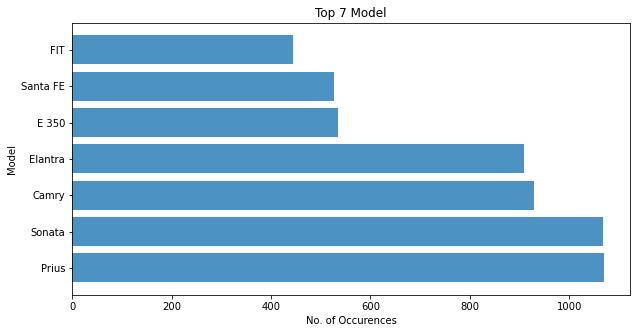

In [346]:
model_count  = df['Model'].value_counts()
model_count = model_count[:7,]
plt.figure(figsize=(10,5))
df_sorted_desc= df.sort_values('Model',ascending=False)
plt.barh(model_count.index, model_count.values, alpha=0.8, data=df_sorted_desc)
plt.title('Top 7 Model')
plt.ylabel('Model', fontsize=10)
plt.xlabel('No. of Occurences', fontsize=10)
plt.show()

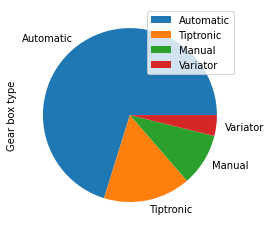

In [347]:
df['Gear box type'].value_counts().plot.pie()
plt.legend()

<AxesSubplot:xlabel='Gear box type', ylabel='Price'>

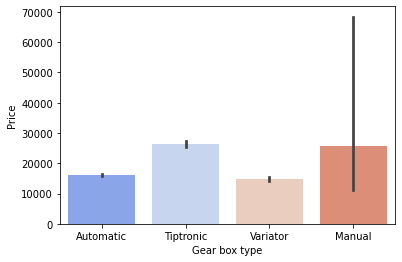

In [356]:
sns.barplot(x='Gear box type', y='Price', data=df, palette='coolwarm')

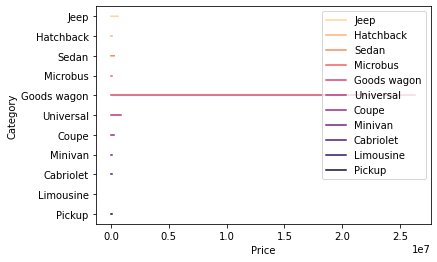

In [371]:
sns.lineplot(x='Price', y='Category', data=df, palette='magma_r', hue='Category')
plt.legend(loc='upper right')

<AxesSubplot:>

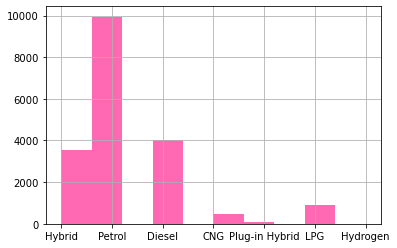

In [386]:
df['Fuel type'].hist(color='hotpink')

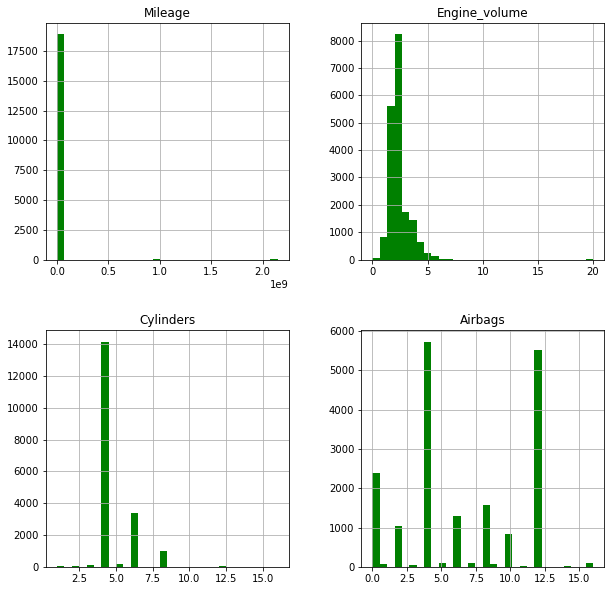

In [388]:
df[['Mileage', 'Engine_volume', 'Cylinders', 'Airbags']].hist(bins=30, figsize=(10,10), color='g', data=df)
plt.show()

<AxesSubplot:xlabel='count', ylabel='Leather interior'>

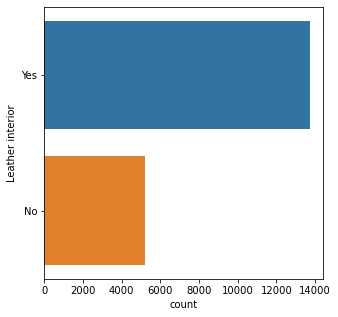

In [399]:
plt.figure(figsize=(5,5))
sns.countplot(y='Leather interior', data=df)